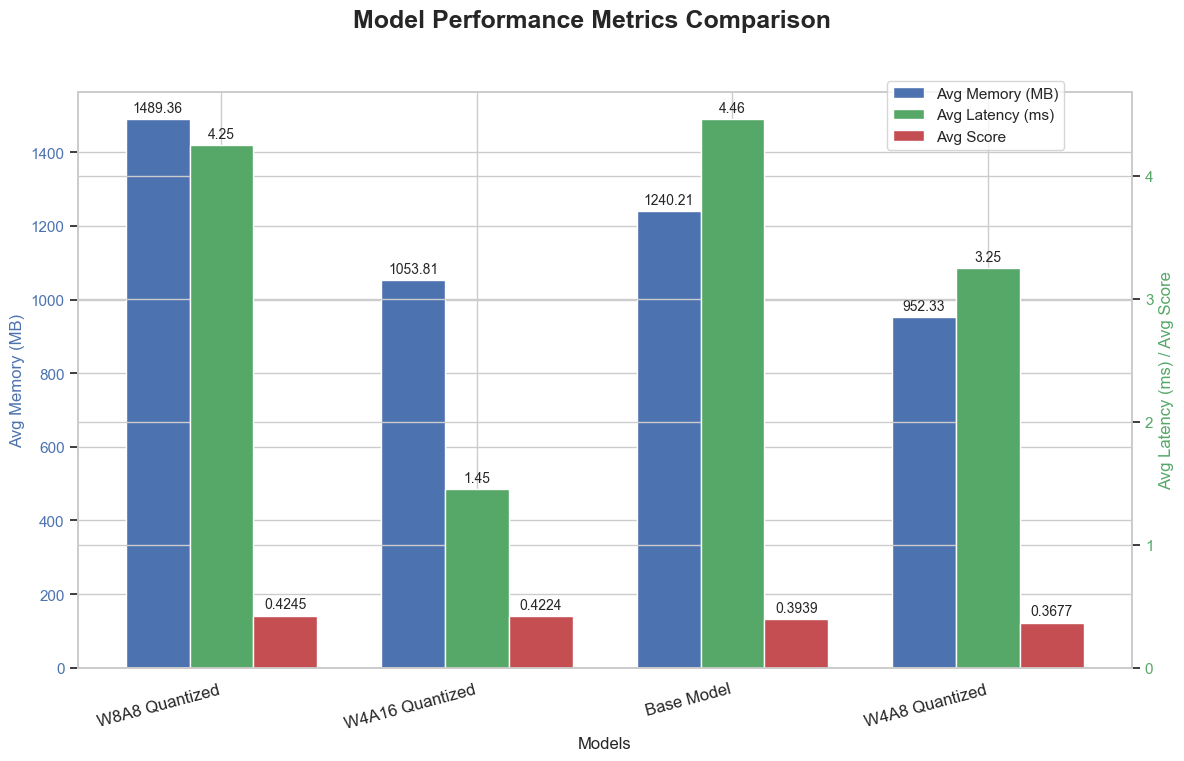

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
models = ['W8A8 Quantized', 'W4A16 Quantized', 'Base Model', 'W4A8 Quantized']
latency = [4.2488, 1.4541, 4.4598, 3.2488]
memory = [1489.3576, 1053.8099, 1240.2071, 952.325]
score = [0.4245, 0.4224, 0.3939, 0.3677]

# Set style
sns.set_theme(style="whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
index = np.arange(len(models))
bar_width = 0.25

# Plot for Memory on primary y-axis (ax1)
bars1 = ax1.bar(index - bar_width, memory, bar_width, label='Avg Memory (MB)', color='b')
ax1.set_ylabel('Avg Memory (MB)', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=15, ha="right", fontsize=12)
ax1.set_xlabel('Models', fontsize=12)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot for Latency on secondary y-axis (ax2)
bars2 = ax2.bar(index, latency, bar_width, label='Avg Latency (ms)', color='g')
# Plot for Score on secondary y-axis (ax2)
bars3 = ax2.bar(index + bar_width, score, bar_width, label='Avg Score', color='r')
ax2.set_ylabel('Avg Latency (ms) / Avg Score', color='g', fontsize=12)
ax2.tick_params(axis='y', labelcolor='g')

# Adding labels on top of the bars
def add_labels(bars, ax, fmt):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:{fmt}}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars1, ax1, '.2f')
add_labels(bars2, ax2, '.2f')
add_labels(bars3, ax2, '.4f')

# Combine handles and labels for a single legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Main title and legend
fig.suptitle('Model Performance Metrics Comparison', fontsize=18, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout

plt.show()


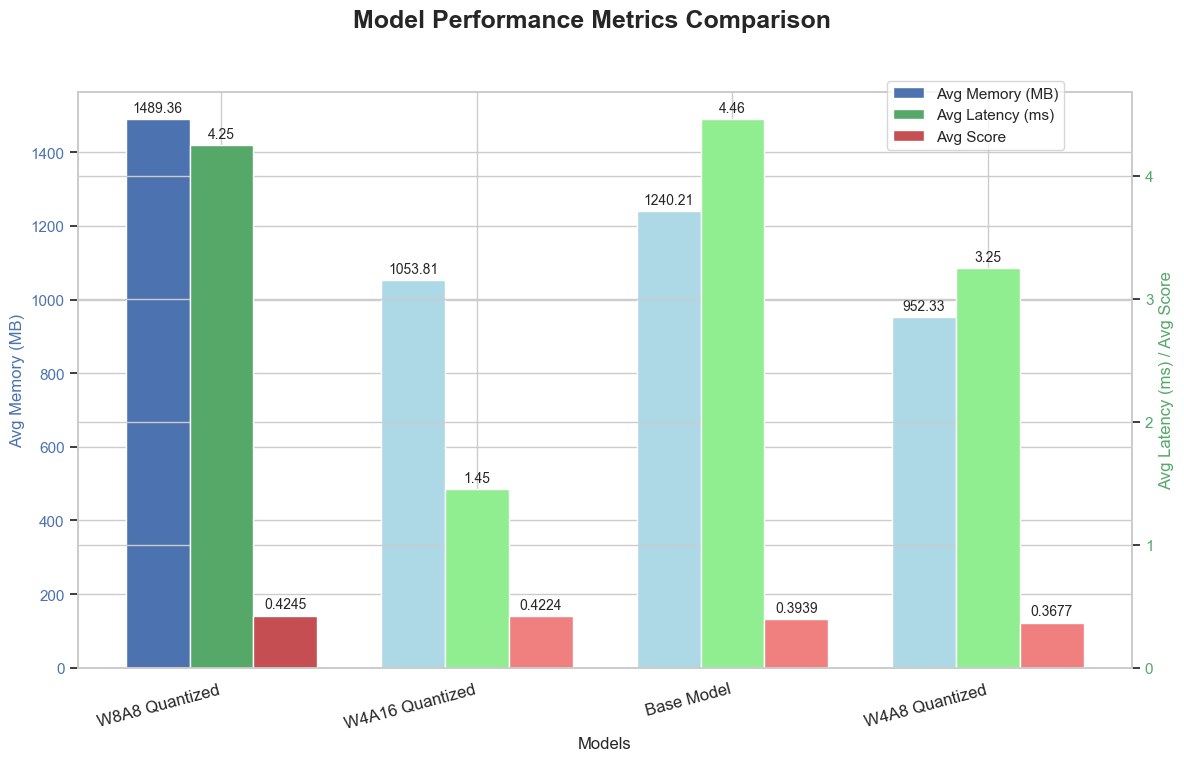

In [3]:
# Data
models = ['W8A8 Quantized', 'W4A16 Quantized', 'Base Model', 'W4A8 Quantized']
latency = [4.2488, 1.4541, 4.4598, 3.2488]
memory = [1489.3576, 1053.8099, 1240.2071, 952.325]
score = [0.4245, 0.4224, 0.3939, 0.3677]

# Set style
sns.set_theme(style="whitegrid")

# Define colors to highlight 'W8A8 Quantized'
highlight_model = 'W8A8 Quantized'
colors_mem = ['b' if model == highlight_model else 'lightblue' for model in models]
colors_lat = ['g' if model == highlight_model else 'lightgreen' for model in models]
colors_sco = ['r' if model == highlight_model else 'lightcoral' for model in models]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Set position of bar on X axis
index = np.arange(len(models))
bar_width = 0.25

# Plot for Memory on primary y-axis (ax1)
bars1 = ax1.bar(index - bar_width, memory, bar_width, label='Avg Memory (MB)', color=colors_mem)
ax1.set_ylabel('Avg Memory (MB)', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=15, ha="right", fontsize=12)
ax1.set_xlabel('Models', fontsize=12)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot for Latency on secondary y-axis (ax2)
bars2 = ax2.bar(index, latency, bar_width, label='Avg Latency (ms)', color=colors_lat)
# Plot for Score on secondary y-axis (ax2)
bars3 = ax2.bar(index + bar_width, score, bar_width, label='Avg Score', color=colors_sco)
ax2.set_ylabel('Avg Latency (ms) / Avg Score', color='g', fontsize=12)
ax2.tick_params(axis='y', labelcolor='g')

# Adding labels on top of the bars
def add_labels(bars, ax, fmt):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:{fmt}}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars1, ax1, '.2f')
add_labels(bars2, ax2, '.2f')
add_labels(bars3, ax2, '.4f')

# Combine handles and labels for a single legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Main title and legend
fig.suptitle('Model Performance Metrics Comparison', fontsize=18, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout

plt.show()


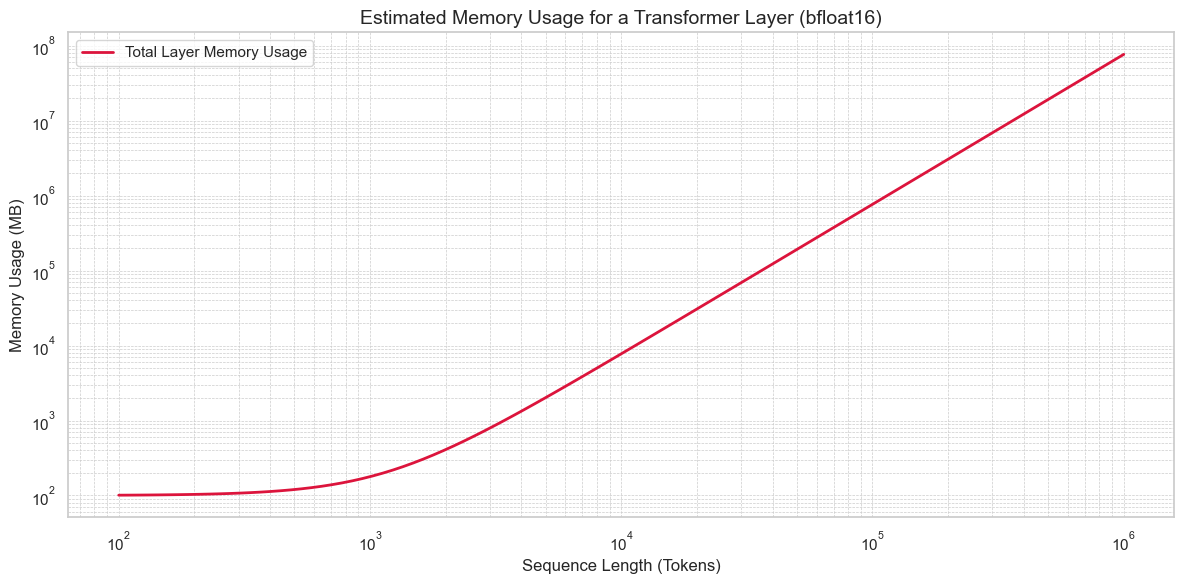

In [5]:
# Constants
H = 40  # Number of attention heads
d_model = 1024 # Model dimension
dtype_size_bytes = 2  # bfloat16 = 2 bytes per value
constant_memory_MB = 100 # Assumed constant memory for weights in MB

# Sequence lengths from 100 to 1 million in exponential steps
sequence_lengths = np.logspace(2, 6, num=100, dtype=int)
memory_MB = []

# Memory needed for a transformer layer
for N in sequence_lengths:
    # Quadratic term: QK^T matrix
    attention_matrix_mem_bytes = H * N * N * dtype_size_bytes
    # Linear term: Activations
    activations_mem_bytes = N * d_model * dtype_size_bytes
    # Total memory in MB
    total_memory_bytes = attention_matrix_mem_bytes + activations_mem_bytes
    total_memory_MB = total_memory_bytes / (1024 ** 2) + constant_memory_MB
    memory_MB.append(total_memory_MB)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sequence_lengths, memory_MB, label="Total Layer Memory Usage", color="crimson", linewidth=2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Sequence Length (Tokens)", fontsize=12)
plt.ylabel("Memory Usage (MB)", fontsize=12)
plt.title("Estimated Memory Usage for a Transformer Layer (bfloat16)", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


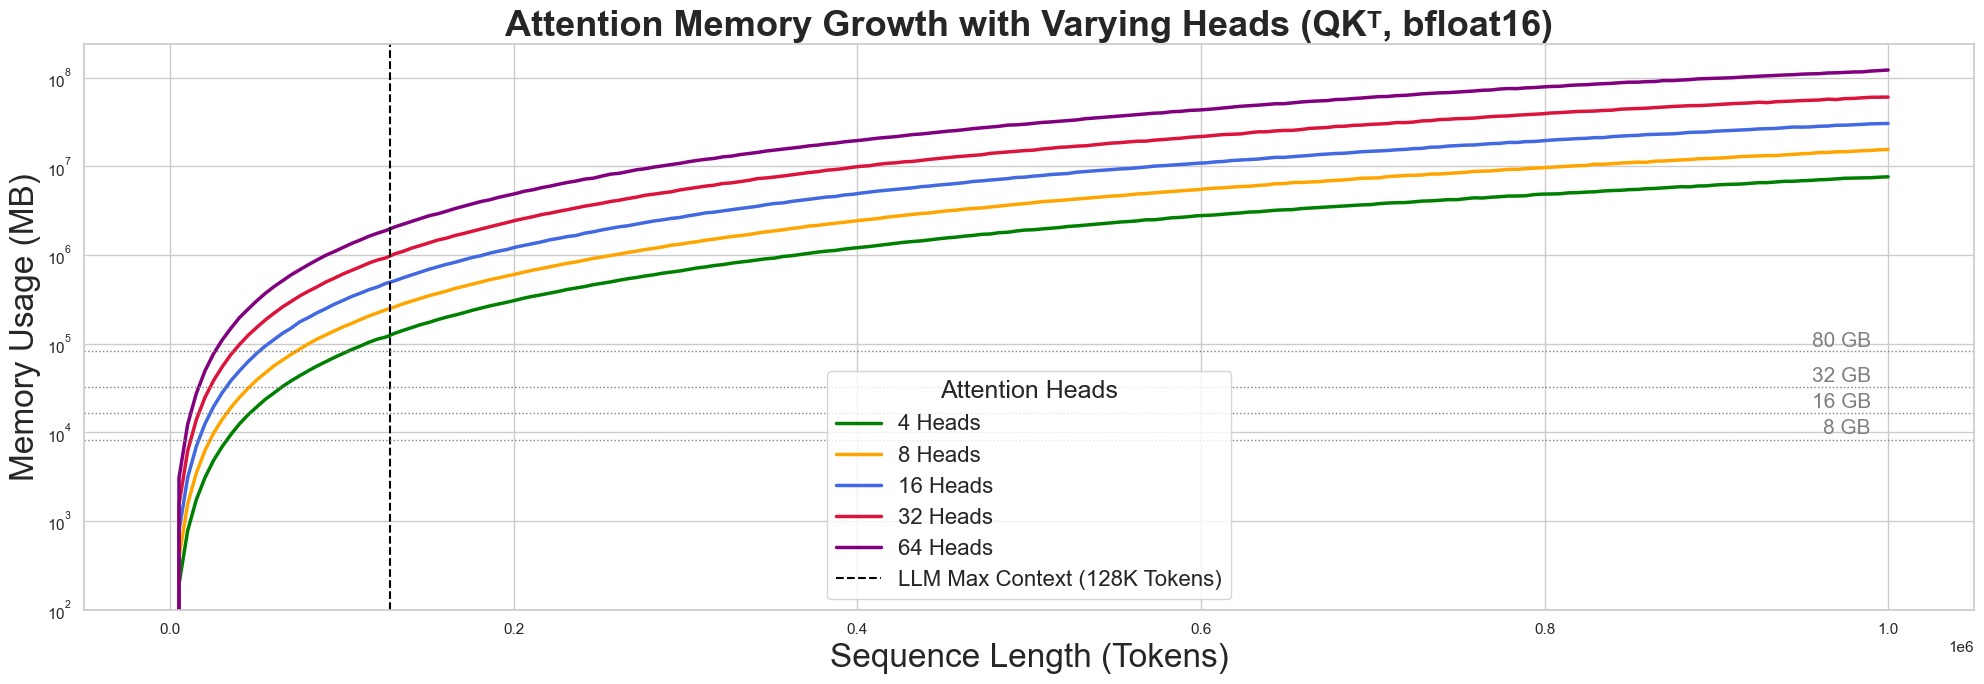

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Setup
sns.set(style="whitegrid")
dtype_size_bytes = 2  # bfloat16
sequence_lengths = np.linspace(0, 1_000_000, num=200, dtype=int)
head_counts = [4, 8, 16, 32, 64]
colors = ['green', 'orange', 'royalblue', 'crimson', 'purple']

plt.figure(figsize=(20, 7))

# Memory computation with slight deviation
for i, (H, color) in enumerate(zip(head_counts, colors)):
    memory_MB_variant = []
    for j, N in enumerate(sequence_lengths):
        base = H * N * N * dtype_size_bytes
        # Add sinusoidal + noise-based deviation
        deviation_factor = 1 + 0.01 * np.sin(j / 15 + i) + 0.005 * np.random.randn()
        adjusted = base * deviation_factor
        memory_MB_variant.append(adjusted / (1024 ** 2))  # Convert to MB
    plt.plot(sequence_lengths, memory_MB_variant, label=f"{H} Heads", color=color, linewidth=2.5)

# Add vertical and horizontal markers
plt.axvline(128000, color='black', linestyle='--', linewidth=1.5, label='LLM Max Context (128K Tokens)')
for mem_gb in [8, 16, 32, 80]:
    plt.axhline(mem_gb * 1024, color='gray', linestyle=':', linewidth=1)
    plt.text(1_000_000 * 0.99, mem_gb * 1024 + 500, f'{mem_gb} GB',
             ha='right', va='bottom', fontsize=15, color='gray')

# Labels and legend
plt.xlabel("Sequence Length (Tokens)", fontsize=24)
plt.ylabel("Memory Usage (MB)", fontsize=24)
plt.title("Attention Memory Growth with Varying Heads (QKᵀ, bfloat16)", fontsize=26, weight='bold')
plt.xscale('linear')
plt.yscale('log')
plt.legend(title="Attention Heads", fontsize=16, title_fontsize=18)
plt.tight_layout()
plt.show()


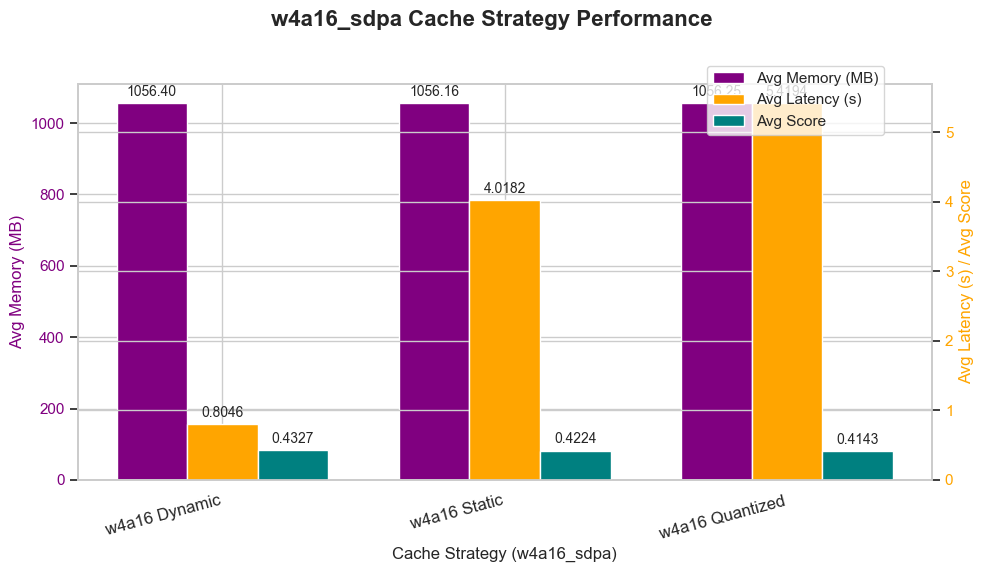

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data for w4a16_sdpa
models = ['w4a16 Dynamic', 'w4a16 Static', 'w4a16 Quantized']
latency = [0.8046, 4.0182, 5.4194]
memory = [1056.3977, 1056.1599, 1056.2500]
score = [0.4327, 0.4224, 0.4143]

# Set style
sns.set_theme(style="whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set position of bar on X axis
index = np.arange(len(models))
bar_width = 0.25

# Plot for Memory on primary y-axis (ax1)
bars1 = ax1.bar(index - bar_width, memory, bar_width, label='Avg Memory (MB)', color='purple')
ax1.set_ylabel('Avg Memory (MB)', color='purple', fontsize=12)
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=15, ha="right", fontsize=12)
ax1.set_xlabel('Cache Strategy (w4a16_sdpa)', fontsize=12)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot for Latency on secondary y-axis (ax2)
bars2 = ax2.bar(index, latency, bar_width, label='Avg Latency (s)', color='orange')
# Plot for Score on secondary y-axis (ax2)
bars3 = ax2.bar(index + bar_width, score, bar_width, label='Avg Score', color='teal')
ax2.set_ylabel('Avg Latency (s) / Avg Score', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Adding labels on top of the bars
def add_labels(bars, ax, fmt):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:{fmt}}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars1, ax1, '.2f')
add_labels(bars2, ax2, '.4f')
add_labels(bars3, ax2, '.4f')

# Combine handles and labels for a single legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Main title and layout
fig.suptitle('w4a16_sdpa Cache Strategy Performance', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


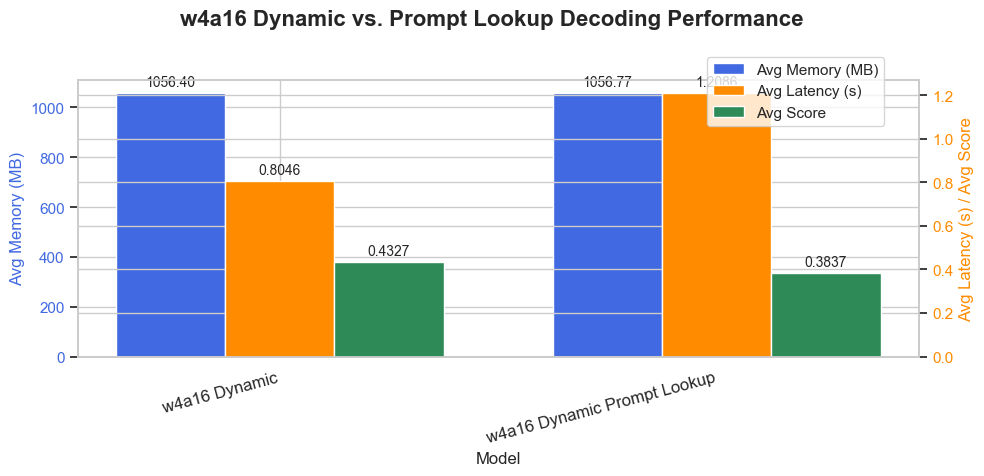

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data for the two models
models = ['w4a16 Dynamic', 'w4a16 Dynamic Prompt Lookup']
latency = [0.8046, 1.2086]
memory = [1056.3977, 1056.7745]
score = [0.4327, 0.3837]

# Set style
sns.set_theme(style="whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Set position of bar on X axis
index = np.arange(len(models))
bar_width = 0.25

# Plot for Memory on primary y-axis (ax1)
bars1 = ax1.bar(index - bar_width, memory, bar_width, label='Avg Memory (MB)', color='royalblue')
ax1.set_ylabel('Avg Memory (MB)', color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=15, ha="right", fontsize=12)
ax1.set_xlabel('Model', fontsize=12)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot for Latency on secondary y-axis (ax2)
bars2 = ax2.bar(index, latency, bar_width, label='Avg Latency (s)', color='darkorange')
# Plot for Score on secondary y-axis (ax2)
bars3 = ax2.bar(index + bar_width, score, bar_width, label='Avg Score', color='seagreen')
ax2.set_ylabel('Avg Latency (s) / Avg Score', color='darkorange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkorange')

# Adding labels on top of the bars
def add_labels(bars, ax, fmt):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:{fmt}}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_labels(bars1, ax1, '.2f')
add_labels(bars2, ax2, '.4f')
add_labels(bars3, ax2, '.4f')

# Combine handles and labels for a single legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='upper right', bbox_to_anchor=(0.9, 0.9))

# Main title and layout
fig.suptitle('w4a16 Dynamic vs. Prompt Lookup Decoding Performance', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

